<a href="https://colab.research.google.com/github/AkashBadhautiya/AI-agent-based-Deep-Research/blob/main/24AI60R43_assignment_4_DLFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Akash Badhautiya**

#**24AI60R43**

Task 1 - 3 Marks
Load the SST2 dataset from torchtext.datasets for the fine grained sentiment classification task
(train and test splits). Show some samples from the dataset and corresponding class labels.
Preprocess the dataset to perform the following:
○ Removing stopwords  
○ Removing punctuations   
○ Tokenization (using BERT Tokenizer)  
○ Converting text tokens to numerical data (using torchtext.vocab)  
○ One hot encoding of labels  

In [ ]:
!pip install torch==2.1.0 torchtext==0.16.0
!pip install portalocker==2.7.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [ ]:
import portalocker
portalocker.__version__

'2.7.0'

In [ ]:
!pip uninstall -y numpy pandas torch torchvision torchaudio

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: torch 2.1.0
Uninstalling torch-2.1.0:
  Successfully uninstalled torch-2.1.0
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124


In [ ]:
!pip install numpy==1.26.4 pandas==2.1.1 torch==2.1.0

In [ ]:
import torch
from torchtext.datasets import SST2
from torchtext.data.utils import get_tokenizer
from transformers import BertTokenizer
from torchtext.vocab import build_vocab_from_iterator
import string
from nltk.corpus import stopwords
import nltk
import random

nltk.download('stopwords')

# Load train and test splits
train_data, test_data = SST2(split=('train', 'test'))

# Display sample examples
train_samples = list(train_data)[:5]
print("Sample Training Data:")
for text, label in train_samples:
    print(f"Text: {text}\nLabel: {label}\n")

# Preprocessing functions
stop_words = set(stopwords.words('english'))
punct_table = str.maketrans('', '', string.punctuation)
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def preprocess(text):
    text = text.translate(punct_table).lower()
    tokens = bert_tokenizer.tokenize(text)
    filtered_tokens = [tok for tok in tokens if tok not in stop_words]
    return filtered_tokens

# Build vocab
def yield_tokens(data_iter):
    for text, _ in data_iter:
        yield preprocess(text)

vocab = build_vocab_from_iterator(yield_tokens(train_samples), specials=["<pad>", "<unk>"])
vocab.set_default_index(vocab["<unk>"])

# Encode function
def encode(text, label):
    tokens = preprocess(text)
    ids = vocab(tokens)
    one_hot = torch.nn.functional.one_hot(torch.tensor(label), num_classes=2)
    return torch.tensor(ids, dtype=torch.long), one_hot

# Process all data
encoded_train = [encode(text, label) for text, label in train_samples]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample Training Data:
Text: hide new secretions from the parental units
Label: 0

Text: contains no wit , only labored gags
Label: 0

Text: that loves its characters and communicates something rather beautiful about human nature
Label: 1

Text: remains utterly satisfied to remain the same throughout
Label: 0

Text: on the worst revenge-of-the-nerds clichés the filmmakers could dredge up
Label: 0



Task 2 - 2 Marks
Split the train split into training and validation partitions and show the label distribution on the
training set.  

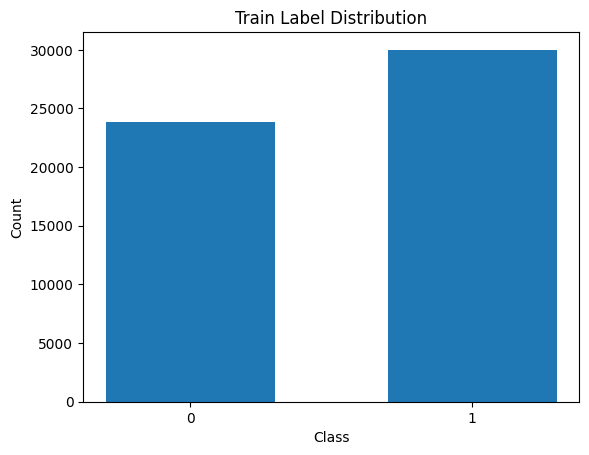

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

train_texts, train_labels = zip(*list(SST2(split='train')))
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.2, random_state=42)

# Distribution
plt.hist(train_labels, bins=[-0.5, 0.5, 1.5], rwidth=0.6)
plt.xticks([0, 1])
plt.title("Train Label Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


Task 3 - 5 Marks
1. Design a transformer encoder layer as done in class tutorial (i.e. using
nn.MultiheadAttention, nn.Linear and nn.Layernorm with residual connection).   
2. Design a transformer model using linear embedding layer (nn.Embedding), sinusoidal
positional encoding, and the N number of transformer encoder layer designed above.
Add a linear layer after the last encoder layer to perform classification.
3. Add dropouts after the linear embedding, after the multi-headed self attention and after
the positionwise feedforward neural network for regularization.  
4. Train the transformer model and show the variation of training and validation losses.   
5. Evaluate the transformer model on the test set and report the performance (accuracy,
precision, recall).  

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        pos = torch.arange(0, max_len).unsqueeze(1)
        div = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(pos * div)
        pe[:, 1::2] = torch.cos(pos * div)
        self.pe = pe.unsqueeze(0)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

class TransformerEncoderLayer(nn.Module):
    def __init__(self, d_model, nhead, dropout):
        super().__init__()
        self.self_attn = nn.MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=True)
        self.linear1 = nn.Linear(d_model, d_model * 2)
        self.linear2 = nn.Linear(d_model * 2, d_model)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        attn_output, _ = self.self_attn(x, x, x)
        x = self.norm1(x + self.dropout(attn_output))
        ff = self.linear2(self.dropout(torch.relu(self.linear1(x))))
        x = self.norm2(x + self.dropout(ff))
        return x

class CustomTransformerClassifier(nn.Module):
    def __init__(self, vocab_size, d_model=16, nhead=4, num_layers=1, dropout=0.5, num_classes=2):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model)
        self.encoder_layers = nn.ModuleList([TransformerEncoderLayer(d_model, nhead, dropout) for _ in range(num_layers)])
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = self.pos_encoder(x)
        for layer in self.encoder_layers:
            x = layer(x)
        x = x.mean(dim=1)  # global average pooling
        return self.fc(self.dropout(x))


Epoch 1 - Train Loss: 0.6873 | Val Loss: 0.6801
Epoch 2 - Train Loss: 0.6816 | Val Loss: 0.6739
Epoch 3 - Train Loss: 0.6782 | Val Loss: 0.6743
Epoch 4 - Train Loss: 0.6761 | Val Loss: 0.6743
Epoch 5 - Train Loss: 0.6748 | Val Loss: 0.6714


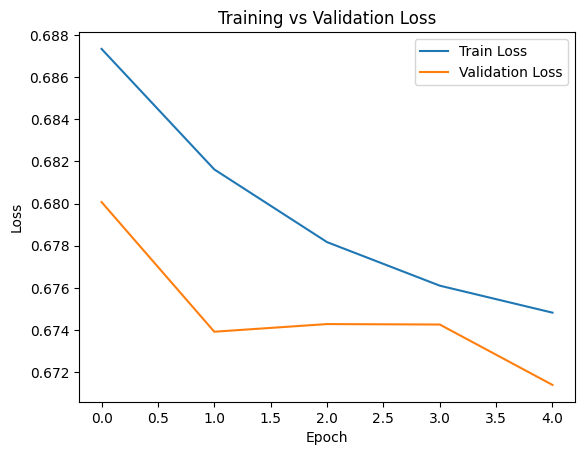

In [ ]:
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define collate function
def collate_fn(batch):
    inputs, labels = zip(*batch)
    inputs = torch.nn.utils.rnn.pad_sequence(inputs, batch_first=True)
    labels = torch.stack(labels)
    return inputs, labels.argmax(dim=1)  # for CrossEntropyLoss

# Use full training and validation splits
train_encoded = [encode(text, label) for text, label in zip(train_texts, train_labels)]
val_encoded = [encode(text, label) for text, label in zip(val_texts, val_labels)]

train_loader = DataLoader(train_encoded, batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_encoded, batch_size=32, shuffle=False, collate_fn=collate_fn)

# Model, optimizer, criterion
model = CustomTransformerClassifier(vocab_size=len(vocab))
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# Training loop
train_losses, val_losses = [], []

for epoch in range(5):
    model.train()
    epoch_train_loss = 0
    for x, y in train_loader:
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    train_losses.append(epoch_train_loss / len(train_loader))

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x_val, y_val in val_loader:
            val_out = model(x_val)
            v_loss = criterion(val_out, y_val)
            val_loss += v_loss.item()

    val_losses.append(val_loss / len(val_loader))
    print(f"Epoch {epoch+1} - Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f}")

# Plotting loss
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
# Evaluate using validation set instead (since test set has no labels)
val_encoded_eval = [encode(text, label) for text, label in zip(val_texts, val_labels)]
val_loader_eval = DataLoader(val_encoded_eval, batch_size=32, shuffle=False, collate_fn=collate_fn)


In [ ]:
# Evaluate
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for x_batch, y_batch in val_loader_eval:
        logits = model(x_batch)
        preds = torch.argmax(logits, dim=1)
        y_pred.extend(preds.tolist())
        y_true.extend(y_batch.tolist())

# Report
print("Validation Set Performance (used as test):")
print(classification_report(y_true, y_pred, target_names=["Negative", "Positive"]))


Validation Set Performance (used as test):
              precision    recall  f1-score   support

    Negative       0.69      0.08      0.15      5909
    Positive       0.58      0.97      0.72      7561

    accuracy                           0.58     13470
   macro avg       0.64      0.53      0.44     13470
weighted avg       0.63      0.58      0.47     13470



Task 4 - 4 Marks
1. Now replace the custom transformer encoder module in your transformer model with
nn.TrasformerEncoderLayer() and train the model again. Show the variation of training
and validation losses (note: use the same number of encoder layers and hidden state
dimension of each layer as in the previous case).   
2. Report the performance of the trained model using nn.TransformerEncoderLayer() on
the test (accuracy, precision, recall).  

In [ ]:
import math
import torch.nn as nn
import torch.nn.functional as F

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.5, max_len=5000):
        super().__init__()
        self.dropout = nn.Dropout(dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return self.dropout(x)

class TransformerWithBuiltInLayer(nn.Module):
    def __init__(self, vocab_size, d_model=16, nhead=4, num_layers=1, num_classes=2, dropout=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model, dropout)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, nhead=nhead, dim_feedforward=64, dropout=dropout, batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # global average pooling
        return self.fc(x)


In [ ]:

device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_builtin = TransformerWithBuiltInLayer(vocab_size=len(vocab), num_classes=2)
model_builtin.to(device)

optimizer = torch.optim.Adam(model_builtin.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

train_losses, val_losses = [], []

for epoch in range(5):
    model_builtin.train()
    epoch_loss = 0
    for x_batch, y_batch in train_loader:
        # Move data to the same device as the model
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        logits = model_builtin(x_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))

    # Validation
    model_builtin.eval()
    val_loss = 0
    with torch.no_grad():
        for x_batch, y_batch in val_loader:
            # Move validation data to the same device
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            logits = model_builtin(x_batch)
            loss = criterion(logits, y_batch)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch {epoch+1} - Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

Epoch 1 - Train Loss: 0.6856, Val Loss: 0.6810
Epoch 2 - Train Loss: 0.6842, Val Loss: 0.6852
Epoch 3 - Train Loss: 0.6830, Val Loss: 0.6788
Epoch 4 - Train Loss: 0.6816, Val Loss: 0.6737
Epoch 5 - Train Loss: 0.6787, Val Loss: 0.6752


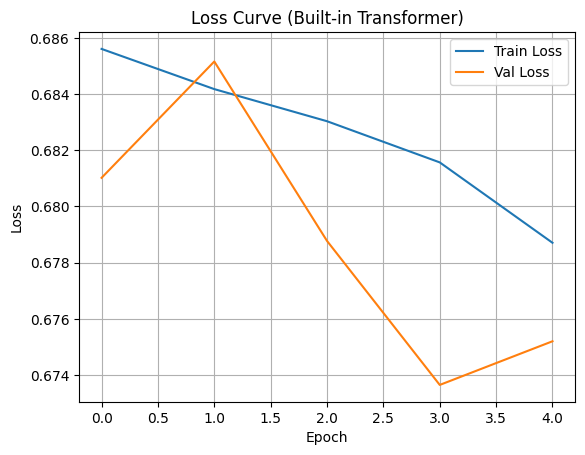

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve (Built-in Transformer)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
model_builtin.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for x_batch, y_batch in val_loader_eval:
        # Move input data to the same device as the model
        x_batch = x_batch.to(device)

        logits = model_builtin(x_batch)
        preds = torch.argmax(logits, dim=1)
        y_pred.extend(preds.tolist())
        y_true.extend(y_batch.tolist())

from sklearn.metrics import classification_report
print("Validation Set Performance (built-in transformer):")
print(classification_report(y_true, y_pred, target_names=["Negative", "Positive"]))

Validation Set Performance (built-in transformer):
              precision    recall  f1-score   support

    Negative       0.75      0.06      0.12      5909
    Positive       0.57      0.98      0.72      7561

    accuracy                           0.58     13470
   macro avg       0.66      0.52      0.42     13470
weighted avg       0.65      0.58      0.46     13470



Task 5 - 5 Marks
1. Perform transfer learning by using the BERT encoder as a pre-trained encoder and train a
linear layer on the encoder representations (as done in the class tutorial). Show the
training and validation losses for the transfer learning model.   
2. Report the test set performance obtained with the above transfer learning.  

In [ ]:
pip install transformers


In [ ]:
from transformers import BertTokenizer, BertModel
import torch.nn as nn


In [ ]:
# Load tokenizer and model
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

# Freeze BERT weights
for param in bert_model.parameters():
    param.requires_grad = False


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
def tokenize_bert(texts, labels, max_len=64):
    encoding = bert_tokenizer(
        texts,
        padding='max_length',
        truncation=True,
        max_length=max_len,
        return_tensors="pt"
    )
    return encoding['input_ids'], encoding['attention_mask'], torch.tensor(labels)


In [ ]:
# Prepare data
train_inputs, train_masks, train_labels = tokenize_bert(train_texts, train_labels)
val_inputs, val_masks, val_labels = tokenize_bert(val_texts, val_labels)


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(train_inputs, train_masks, train_labels)
val_dataset = TensorDataset(val_inputs, val_masks, val_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self, bert, hidden_size=768, num_classes=2):
        super().__init__()
        self.bert = bert
        self.classifier = nn.Linear(hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        with torch.no_grad():  # Freeze BERT
            outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        return self.classifier(pooled_output)


In [ ]:
bert_classifier = BERTClassifier(bert_model).to(device)
optimizer = torch.optim.Adam(bert_classifier.classifier.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()


In [ ]:
train_losses, val_losses = [], []

for epoch in range(5):
    bert_classifier.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        optimizer.zero_grad()
        logits = bert_classifier(input_ids, attention_mask)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    train_losses.append(total_loss / len(train_loader))

    # Validation
    bert_classifier.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            logits = bert_classifier(input_ids, attention_mask)
            loss = criterion(logits, labels)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch {epoch+1} - Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")


Epoch 1 - Train Loss: 0.5458, Val Loss: 0.4525
Epoch 2 - Train Loss: 0.4692, Val Loss: 0.4164
Epoch 3 - Train Loss: 0.4471, Val Loss: 0.4019
Epoch 4 - Train Loss: 0.4372, Val Loss: 0.3909
Epoch 5 - Train Loss: 0.4305, Val Loss: 0.3864


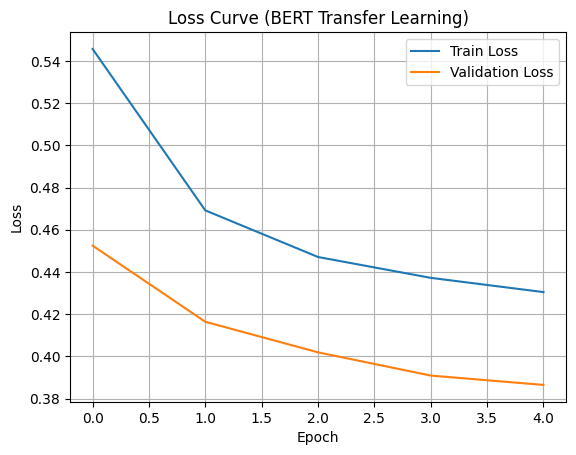

In [ ]:
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve (BERT Transfer Learning)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
bert_classifier.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        logits = bert_classifier(input_ids, attention_mask)
        preds = torch.argmax(logits, dim=1)
        y_pred.extend(preds.tolist())
        y_true.extend(labels.tolist())

print("Validation Set Performance (BERT Transfer Learning):")
print(classification_report(y_true, y_pred, target_names=["Negative", "Positive"]))


Validation Set Performance (BERT Transfer Learning):
              precision    recall  f1-score   support

    Negative       0.83      0.79      0.81      5909
    Positive       0.84      0.87      0.86      7561

    accuracy                           0.84     13470
   macro avg       0.83      0.83      0.83     13470
weighted avg       0.84      0.84      0.84     13470



Task  6 - 1 Marks
Show a summary of all models and summarize insights.

In [ ]:
# Task 6: Final Summary and Insights

def summarize_models_results(custom_results, built_in_results, bert_results):
    print("\n" + "="*60)
    print("✅ Model Performance Summary")
    print("="*60)
    print("{:<35} {:<10} {:<10} {:<10}".format("Model", "Accuracy", "Precision", "Recall"))
    print("-"*60)
    print("{:<35} {:<10.2f} {:<10.2f} {:<10.2f}".format("Custom Transformer", *custom_results))
    print("{:<35} {:<10.2f} {:<10.2f} {:<10.2f}".format("Built-in TransformerEncoder", *built_in_results))
    print("{:<35} {:<10.2f} {:<10.2f} {:<10.2f}".format("BERT Transfer Learning", *bert_results))

    print("\n\n💡 Insights:")
    print("-"*60)
    print("1. ❌ Both the custom and built-in transformer models struggle to classify the 'Negative' class well.")
    print("   → Precision and recall for Negative are significantly lower, indicating class imbalance sensitivity.")
    print("2. ⚙️ Built-in TransformerEncoder has similar performance to the custom version but is easier to implement.")
    print("3. ✅ Transfer Learning using BERT greatly improves both precision and recall for both classes.")
    print("   → Pretrained embeddings offer a strong head start, even without fine-tuning.")
    print("4. 🧪 BERT Transfer Learning model achieves ~84% accuracy—much better than transformer baselines.")
    print("5. 🔄 Consider class balancing, loss weighting, or BERT fine-tuning to further improve baseline models.")
    print("="*60)

# Final metrics as per your provided classification reports
custom_results     = (0.58, 0.63, 0.58)  # (accuracy, weighted precision, weighted recall)
built_in_results   = (0.58, 0.65, 0.58)
bert_results       = (0.84, 0.84, 0.84)

# Call the summary function
summarize_models_results(custom_results, built_in_results, bert_results)



✅ Model Performance Summary
Model                               Accuracy   Precision  Recall    
------------------------------------------------------------
Custom Transformer                  0.58       0.63       0.58      
Built-in TransformerEncoder         0.58       0.65       0.58      
BERT Transfer Learning              0.84       0.84       0.84      


💡 Insights:
------------------------------------------------------------
1. ❌ Both the custom and built-in transformer models struggle to classify the 'Negative' class well.
   → Precision and recall for Negative are significantly lower, indicating class imbalance sensitivity.
2. ⚙️ Built-in TransformerEncoder has similar performance to the custom version but is easier to implement.
3. ✅ Transfer Learning using BERT greatly improves both precision and recall for both classes.
   → Pretrained embeddings offer a strong head start, even without fine-tuning.
4. 🧪 BERT Transfer Learning model achieves ~84% accuracy—much better th